In [1]:
import pandas as pd
import seaborn as sns
sns.reset_orig()

/Users/ulyana/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/Users/ulyana/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)


## 1. Загрузить файл hr.csv

In [2]:
df = pd.read_csv('HR.csv')

In [3]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## 2. Рассчитать основные статистики для переменных

In [4]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [5]:
df.median()

satisfaction_level         0.64
last_evaluation            0.72
number_project             4.00
average_montly_hours     200.00
time_spend_company         3.00
Work_accident              0.00
left                       0.00
promotion_last_5years      0.00
dtype: float64

In [6]:
df.mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


## 3. Рассчитать и визуализировать корреляционную матрицу для переменных

In [10]:
df.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


Удаляю столбцы 'sales','salary', т.к. они типа string.

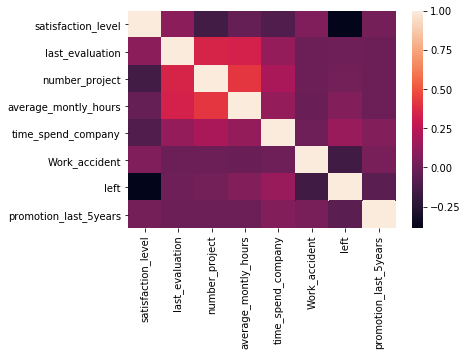

In [11]:
ax = sns.heatmap(df.drop(columns=['sales','salary']).corr())

Судя по матрице, наибольшая связь должна быть между переменными 'average_monthly_hours' и 'number_project', поэтому проверяю визуализирую их (и другие) ниже.

## 4. Визуализировать несколько взаимосвязей между переменными

/Users/ulyana/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


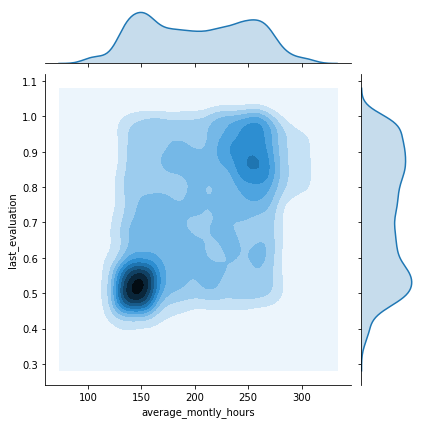

In [10]:
sns.jointplot(x="average_montly_hours", y="last_evaluation", data=df, kind = 'kde')

По графику видно, что есть два пика распределения. Первый — в значениях 'last_evaluation' 0,4 – 0,6 и 'average_monthly_hours' примерно 120 – 160. Второй — в значениях 'last_evaluation' 0,8 – 1,0 и 'average_monthly_hours' примерно 220 – 280. В остальных значениях есть тренд (менее проглядываемый) взаимозависимости: высокая оценка — много часов, низкая оценка — мало часов. 

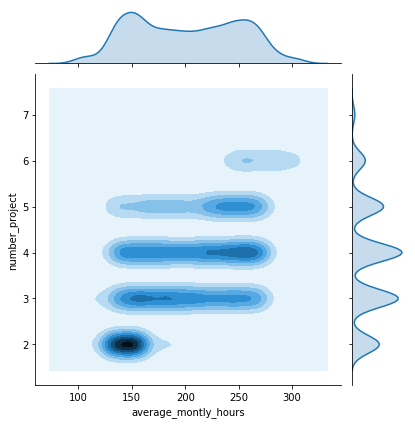

In [8]:
sns.jointplot(x="average_montly_hours", y="number_project", data=df, kind='kde')

По графику, при небольшом количестве проектов 'average_monthly_hours' чаще принимает минимальные значения. При кол-ве проектов 3-4 кол-во часов принимает значения 150 – 250 примерно с одниаковой частотой. При кол-ве проектов ~5 'average_monthly_hours' чаще принимает более высокие значения. При дальнейшем повышении кол-ва проектов распределение 'average_monthly_hours' смещается вправо.

## 5. С использованием t-test статистики проверить взаимосвязи между несколькими переменными.

In [13]:
import numpy as np
from scipy.stats import t
from scipy.stats import ttest_ind

Сравниваем значимость разницы уровня удовлетворённости при работе в продажах и в менеджменте. Разница не статзначима.

In [20]:
ttest_ind(df[df['sales']=='sales'].satisfaction_level,df[df['sales']=='management'].satisfaction_level)

Ttest_indResult(statistic=-0.6523933694142945, pvalue=0.5141788904916511)

Сравниваем значимость разницы в кол-ве лет в компании при низкой и высокой зарплате. Разница статзначима.

In [24]:
ttest_ind(df[df['salary']=='low'].time_spend_company,df[df['salary']=='high'].time_spend_company)

Ttest_indResult(statistic=-5.827169633335566, pvalue=5.841716283222613e-09)

## 6. Рассчитать сколько работников работает в каждом департаменте.

In [17]:
df.groupby('number_project').count()

,satisfaction_level,last_evaluation,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
number_project,,,,,,,,,
2,2388,2388,2388,2388,2388,2388,2388,2388,2388
3,4055,4055,4055,4055,4055,4055,4055,4055,4055
4,4365,4365,4365,4365,4365,4365,4365,4365,4365
5,2761,2761,2761,2761,2761,2761,2761,2761,2761
6,1174,1174,1174,1174,1174,1174,1174,1174,1174
7,256,256,256,256,256,256,256,256,256


## 7. Показать распределение сотрудников по зарплатам.

In [18]:
import matplotlib.pyplot as plt

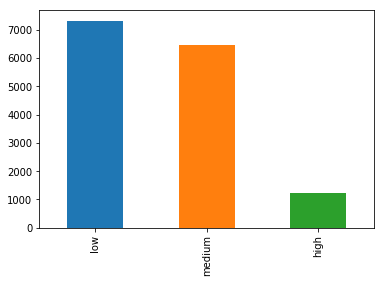

In [25]:
df.salary.value_counts().plot(kind='bar')

## 8. Показать распределение сотрудников по зарплатам совместно с департаментами.

In [11]:
df.sales.value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

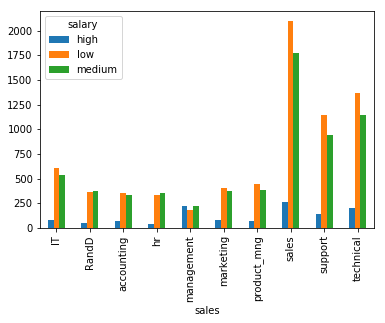

In [12]:
df.groupby('sales').salary.value_counts().unstack().plot.bar()

Везде, кроме менеджемента, распределение зарплат смещено в сторону низких или средних. В менеджменте чаще получают высокие или средние зарплаты. 

## 9. Сколько сотрудников покинули компанию.

In [35]:
df[df.left == 1].count()

satisfaction_level       3571
last_evaluation          3571
number_project           3571
average_montly_hours     3571
time_spend_company       3571
Work_accident            3571
left                     3571
promotion_last_5years    3571
sales                    3571
salary                   3571
dtype: int64